In [8]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:

estimated_sales = [57000, 21850, 22400, 33040, 9875, 170840, 132750, 71400, 30000, 12500, 1500, 35100, 36000, 14000, 10000, 21000, 36480, 26880,
                   6480, 30000, 36210, 45360, 900, 2610, 3600, 4050, 4500, 35480, 13050, 2850, 1200, 3600, 1800, 1800, 150000, 100000, 36000, 9000, 7200, 18000, 4200]
actual_sales = [0 for i in range(41)]
# 所有地的面积
aera = [80, 55, 35, 72, 68, 55,  # flat 0-5
        60, 46, 40, 28, 25, 86, 55, 44, 50, 25, 60, 45, 35, 20,  # 梯田terraced 6-19
        15, 13, 15, 18, 27, 20,  # 山坡hilly 20-25
        15, 10, 14, 6, 10, 12, 22, 20,  # 水浇irri 26-33
        0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,  # common 34-49
        0.6, 0.6, 0.6, 0.6]  # smart50-53

yield_num = {"flat dry land": [400, 500, 400, 350, 415, 800, 1000, 400, 630, 525, 110, 3000, 2200, 420, 525],

             "terraced fields": [380, 475, 380, 330, 395, 760, 950, 380, 600, 500, 105, 2850, 2100, 400, 500],

             "hilly land": [360, 450, 360, 315, 375, 720, 900, 360, 570, 475, 100, 2700, 2000, 380, 475],

             "irrigable land": [500, 3000, 2000, 3000, 2000, 2400, 6400, 2700, 2400, 3300, 3700, 4100, 3200, 12000, 4100, 1600, 10000, 5000, 5500, 5000, 4000, 3000],

             "common greenhouse": [3600, 2400, 3600, 2400, 3000, 8000, 3300, 3000, 4000, 4500, 5000, 4000, 15000, 5000, 2000, 12000, 6000, 6600, 5000, 4000, 10000, 1000],

             "smart greenhouse": [3200, 2200, 3200, 2200, 2700, 7200, 3000, 2700, 3600, 4100, 4500, 3600, 13500, 4500, 1800, 11000, 5400, 6000]}

crop_class = {"flat dry land": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],

              "terraced fields": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],

              "hilly land": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],

              "irrigable land": [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37],

              "common greenhouse": [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41],

              "smart greenhouse": [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]}

cost = {"flat dry land": [400, 400, 350, 350, 350, 450, 500, 360, 400, 360, 350, 1000, 2000, 400, 350],

        "terraced fields": [400, 400, 350, 350, 350, 450, 500, 360, 400, 360, 350, 1000, 2000, 400, 350],

        "hilly land": [400, 400, 350, 350, 350, 450, 500, 360, 400, 360, 350, 1000, 2000, 400, 350],

        "irrigable land": [680, 2000, 1000, 2000, 2000, 2000, 2000, 2300, 1600, 2400, 2900, 1600, 1600, 2900, 1600, 1000, 4100, 2000, 900, 2000, 500, 500],

        "common greenhouse": [2400, 1200, 2400, 2400, 2400, 2400, 2700, 2000, 3000, 3500, 2000, 2000, 3500, 2000, 1200, 5000, 2500, 1100, 3000, 2000, 10000, 10000],

        "smart greenhouse": [2640, 1320, 2640, 2640, 2640, 2640, 3000, 2200, 3300, 3850, 2200, 2200, 3850, 2200, 1300, 5500, 2750, 1200]}


def price(n, output, e=1):

    min = [2.5, 6.5, 7.5, 6, 6, 3, 2.5, 6, 5.5, 6.5, 30, 1, 2.5, 5, 3, 6, 7, 5.5, 5,
           3, 5, 5, 4.8, 4, 5, 5.5, 4, 5, 6, 4.5, 6, 3, 4, 3.2, 2, 2, 2.5, 50, 18, 14, 80]

    max = [4, 8.5, 9, 8, 7.5, 4, 3.5, 7.5, 6.5, 8.5, 50, 2, 4, 6, 4, 8, 9, 8, 8, 4.5,
           7.5, 6, 6.7, 6.5, 6, 7.5, 6, 6.5, 8, 6, 8.5, 6, 5, 4.8, 3, 3, 4, 65, 20, 18, 120]
    if output >= estimated_sales[n-1]:

        return min[n-1]

    else:

        return min[n-1] + (max[n-1] - min[n-1]) * ((estimated_sales[n-1] - output)/estimated_sales[n-1]) ** e


# 利润计算函数
def caculate_profit(cost, price_, field_num, mu_shu, due_num, actual_num, strategy) -> float:
    if strategy == 1:  # 滞销策略
        if actual_num <= due_num:
            diff = due_num - actual_num
            if field_num * mu_shu <= diff:
                return field_num * mu_shu * price_ - cost * mu_shu
            else:
                return diff * price_ - cost * mu_shu
        else:
            return -cost * mu_shu
    else:  # 降价销售策略
        if actual_num <= due_num:
            diff = due_num - actual_num
            if field_num * mu_shu <= diff:
                return field_num * mu_shu * price_ - cost * mu_shu
            else:
                return diff + (field_num * mu_shu - diff) * price_ * 0.5 - cost * mu_shu
        else:
            return field_num * mu_shu * price_ * 0.5 - cost * mu_shu

# 利润矩阵函数


def profit_matrix_(area, yield_num, crop_class, cost, e, strategy, season, actual_list):
    """生成利润矩阵，依据季节和田地类型来确定可种植作物范围"""
    rows, cols = 54, 41
    profit_matrix = [[0 for _ in range(cols)] for _ in range(rows)]

    for i in range(rows):
        plant = []
        plant_cost = []
        plant_yield_num = []
        if 0 <= i <= 5 and season == 1:
            plant = crop_class['flat dry land']
            plant_cost = cost['flat dry land']
            plant_yield_num = yield_num['flat dry land']
        elif 6 <= i <= 19 and season == 1:
            plant = crop_class['terraced fields']
            plant_cost = cost['terraced fields']
            plant_yield_num = yield_num['terraced fields']
        elif 20 <= i <= 25 and season == 1:
            plant = crop_class['hilly land']
            plant_cost = cost['hilly land']
            plant_yield_num = yield_num['hilly land']
        elif 26 <= i <= 33:
            if season == 1:
                # 第一季水田只能种植 16-34 之间的作物
                plant = [p for p in crop_class['irrigable land']
                         if 16 <= p <= 34]
                plant_cost = cost['irrigable land'][0:19]
                plant_yield_num = yield_num['irrigable land'][0:19]
            elif season == 2:
                # 第二季水田只能种植 35-37 之间的作物
                plant = [p for p in crop_class['irrigable land']
                         if 35 <= p <= 37]
                plant_cost = cost['irrigable land'][19:]
                plant_yield_num = yield_num['irrigable land'][19:]
        elif 34 <= i <= 49:  # 普通大棚
            if season == 1:
                # 第一季普通大棚只能种植 17-34 之间的作物
                plant = [p for p in crop_class['common greenhouse']
                         if 17 <= p <= 34]
                plant_cost = cost['common greenhouse'][0:18]
                plant_yield_num = yield_num['common greenhouse'][0:18]
            elif season == 2:
                # 第二季普通大棚只能种植 38-41 之间的作物
                plant = [p for p in crop_class['common greenhouse']
                         if 38 <= p <= 41]
                plant_cost = cost['common greenhouse'][18:]
                plant_yield_num = yield_num['common greenhouse'][18:]
        elif 50 <= i <= 53:  # 智慧大棚
            # 智慧大棚两季都可以种植 17-34 之间的作物
            plant = [p for p in crop_class['smart greenhouse'] if 17 <= p <= 34]
            plant_cost = cost['smart greenhouse']
            plant_yield_num = yield_num['smart greenhouse']

        plant_price = []
        for ii in plant:
            tmp_price = price(ii, actual_list[ii - 1], e)
            plant_price.append(tmp_price)

        plant_list_index = 0
        for j in plant:
            profit_matrix[i][j - 1] = caculate_profit(
                plant_cost[plant_list_index],
                plant_price[plant_list_index],
                plant_yield_num[plant_list_index],
                area[i],
                estimated_sales[j - 1],
                actual_list[j - 1],
                strategy
            )
            if j == 6 or j == 7:
                profit_matrix[i][j-1] *= (0.273 + 1)
            elif 1 <= j <= 5 or 8 <= j <= 16:
                profit_matrix[i][j-1] *= (1-0.0447)
            elif 17 <= j <= 37:
                profit_matrix[i][j-1] *= (0.224 + 1)
            elif 38 <= j <= 40:
                profit_matrix[i][j-1] *= (-0.185 + 1)
            else:
                profit_matrix[i][j-1] *= (1 - 0.265)
            plant_list_index += 1

    return profit_matrix
# 查找最佳作物


def find_property_crop(area, profit_matrix, Have_bean, Crops_id_last_year, due_num, e, strategy, prev_crop=None, max_recursion_depth=10, is_second_season=False, area_second=None):
    flag = 0
    if is_second_season == True:
        plant_idx_tmp = profit_matrix[area_second].index(
            max(profit_matrix[area_second]))
        return plant_idx_tmp, area_second, max(profit_matrix[area_second]), True, flag
    if np.max(profit_matrix) == 0:
        flag = 1
        return -1, -1, 0, False, flag  # 没有可种植作物

    crop_area_pair = np.where(profit_matrix == np.max(profit_matrix))
    area_idx = crop_area_pair[0][0]  # 提取第一个索引
    plant_idx = crop_area_pair[1][0]  # 提取第一个索引

    # 检查水稻（id == 16），确保只能在第一季种植
    if is_second_season and plant_idx + 1 == 16:
        profit_matrix[area_idx][plant_idx] = 0  # 禁止第二季种植水稻，设利润为0
        return find_property_crop(area, profit_matrix, Have_bean, Crops_id_last_year, due_num, e, strategy, prev_crop, max_recursion_depth - 1, is_second_season)

    # 优先考虑豆类的种植
    if Have_bean[area_idx] == 3 and not (0 <= plant_idx <= 4 or 16 <= plant_idx <= 18):
        bean_tmp = []
        if area_idx <= 25:  # 单季田
            for i in range(5):
                bean_tmp.append(caculate_profit(
                    cost['flat dry land'][i], price(i + 1, actual_sales[i], 1), yield_num['flat dry land'][i], area[area_idx], estimated_sales[i], actual_sales[i], strategy))
            bean_idx = bean_tmp.index(max(bean_tmp))
            return bean_idx, area_idx, max(bean_tmp), True, flag
        else:
            for i in range(3):
                if 26 <= area_idx <= 33:
                    bean_tmp.append(caculate_profit(cost['irrigable land'][i], price(
                        i + 17, actual_sales[i + 17], 1), yield_num['irrigable land'][i], area[area_idx], estimated_sales[i + 17], actual_sales[i + 17], strategy))
                elif 34 <= area_idx <= 49:
                    bean_tmp.append(caculate_profit(
                        cost['common greenhouse'][i], price(
                            i + 17, actual_sales[i + 17], 1), yield_num['common greenhouse'][i], area[area_idx], estimated_sales[i + 17], actual_sales[i + 17], strategy))
                else:
                    bean_tmp.append(caculate_profit(
                        cost['smart greenhouse'][i], price(
                            i + 17, actual_sales[i + 17], 1), yield_num['smart greenhouse'][i], area[area_idx], estimated_sales[i + 17], actual_sales[i + 17], strategy))
            bean_idx = bean_tmp.index(max(bean_tmp)) + 16
            return bean_idx, area_idx, max(bean_tmp), False, flag

    # 排除重茬：检查上一年种植情况，确保不重复种植上一年种过的作物
    if max_recursion_depth > 0:
        for i in range(len(Crops_id_last_year[area_idx])):
            if (Crops_id_last_year[area_idx][i] - 1) == plant_idx or plant_idx == prev_crop:
                profit_matrix[area_idx][plant_idx] = 0  # 禁止重复种植上一年种过的作物
                return find_property_crop(area, profit_matrix, Have_bean, Crops_id_last_year, due_num, e, strategy, prev_crop, max_recursion_depth - 1, is_second_season)
    else:
        # 达到递归深度限制时，返回一个默认值或报错
        return plant_idx, area_idx, np.max(profit_matrix), False, flag

    if area_idx <= 25:
        return plant_idx, area_idx, np.max(profit_matrix), True, flag
    else:
        return plant_idx, area_idx, np.max(profit_matrix), False, flag


def GetBeanAndCrops_2023():
    file_2023 = "D:\Learning\Math model match\C题\附件2_standard.xlsx"
    Have_bean = []
    values_dict = {}
    bean_data = pd.read_excel(file_2023, sheet_name="2023年的农作物种植情况")
    # 遍历每一行，将值添加到字典
    last_name = None  # 记录上一个有效的名称
    for index, row in bean_data.iterrows():
        name = row[0]  # 第一列
        value = row[1]  # 第二列
        # 如果名称是 NaN，使用 last_name
        if pd.isna(name):
            name = last_name  # 继续使用上一个有效名称
        else:
            last_name = name  # 更新上一个有效名称

        if name not in values_dict:
            values_dict[name] = []  # 初始化一个列表
        values_dict[name].append(value)  # 添加值
    Crops_id_2023 = [[] + values for name, values in values_dict.items()]
    for item in Crops_id_2023:
        length = len(item)
        flag = 0
        for i in range(length):
            if 1 <= item[i] <= 5 or 17 <= item[i] <= 19:
                Have_bean.append(0)  # 有豆，三年后种
                flag = 1
                break
        if flag == 0:
            Have_bean.append(1)  # 没豆，两年后种，值等于3的时候种豆
    return Have_bean, Crops_id_2023

# 模拟种植策略


def run_simulation(area, estimated_sales, strategy):
    have_bean, crop_id_last_year = GetBeanAndCrops_2023()
    result = []
    result_TotalProfit = []
    copy_area_original = copy.deepcopy(area)
    for year in range(7):
        decrease_list = [0]*54
        actual_sales = [0] * 41
        crop_id_this_year = [[] for _ in range(54)]
        area = copy.deepcopy(copy_area_original)
        tmp_area = []
        for i in area:
            tmp_area.append(i*0.5)
        result_bool = [False] * 54
        result_TotalProfit_tmp = []
        # print(area)
        while not all(result_bool):  # 未完成所有地块
            # 处理第一季
            profit_matrix = profit_matrix_(
                tmp_area, yield_num, crop_class, cost, 1, strategy, 1, actual_sales)
            # print(profit_matrix)
            plant_idx, area_idx, max_profit, one_season_only, flag = find_property_crop(
                area, profit_matrix, have_bean, crop_id_last_year, estimated_sales, 1, strategy)
            if flag == 1:
                break
            MuChanLiang = 0
            if 0 <= area_idx <= 5:
                MuChanLiang = yield_num['flat dry land'][crop_class['flat dry land'].index(
                    plant_idx+1)]
            elif 6 <= area_idx <= 19:
                MuChanLiang = yield_num['terraced fields'][crop_class['terraced fields'].index(
                    plant_idx+1)]
            elif 20 <= area_idx <= 25:
                MuChanLiang = yield_num['hilly land'][crop_class['hilly land'].index(
                    plant_idx+1)]
            elif 26 <= area_idx <= 33:
                MuChanLiang = yield_num['irrigable land'][crop_class['irrigable land'].index(
                    plant_idx+1)]
            elif 34 <= area_idx <= 49:
                MuChanLiang = yield_num['common greenhouse'][crop_class['common greenhouse'].index(
                    plant_idx+1)]
            elif 50 <= area_idx <= 53:
                MuChanLiang = yield_num['smart greenhouse'][crop_class['smart greenhouse'].index(
                    plant_idx+1)]
            actual_sales[plant_idx] += MuChanLiang * area[area_idx]
            # if year == 2 and area_idx == 4:
            #     print(decrease_list[4])
            if decrease_list[area_idx] == 0:
                area[area_idx] -= 0.5 * area[area_idx]
                decrease_list[area_idx] += 1
            elif decrease_list[area_idx] == 1:
                area[area_idx] = 0
                tmp_area[area_idx] = 0
                decrease_list[area_idx] += 1
            else:
                continue
            crop_id_this_year[area_idx].append(plant_idx + 1)

            # if year == 1 and strategy == 2:
            #     print("1:",crop_id_this_year)
            #     print("area: ",area)
            #     print("decrease: ",decrease_list)
            result_TotalProfit_tmp.append(max_profit)
            if 0 <= plant_idx <= 5 or 16 <= plant_idx <= 18:
                have_bean[area_idx] = 0
            # 如果不是种植 plant_id == 16 的作物，处理第二季
            if not one_season_only and area_idx >= 26:  # 水田或普通/智慧大棚
                MuChanLiang2 = 0
                profit_matrix_second_season = profit_matrix_(
                    tmp_area, yield_num, crop_class, cost, 1, strategy, 2, actual_sales)
                plant_idx_second, _, max_profit_second, _, _ = find_property_crop(
                    area, profit_matrix_second_season, have_bean, crop_id_last_year, estimated_sales, 1, strategy, prev_crop=plant_idx, is_second_season=True, area_second=area_idx)
                if plant_idx_second == 15:
                    continue
                if 26 <= area_idx <= 33:
                    MuChanLiang2 = yield_num['irrigable land'][crop_class['irrigable land'].index(
                        plant_idx+1)]
                elif 34 <= area_idx <= 49:
                    MuChanLiang2 = yield_num['common greenhouse'][crop_class['common greenhouse'].index(
                        plant_idx+1)]
                elif 50 <= area_idx <= 53:
                    MuChanLiang2 = yield_num['smart greenhouse'][crop_class['smart greenhouse'].index(
                        plant_idx+1)]
                actual_sales[plant_idx] += MuChanLiang2 * area[area_idx]
                crop_id_this_year[area_idx].append(plant_idx_second + 1)
                result_TotalProfit_tmp.append(max_profit_second)
            if area[area_idx] <= 0.01:
                result_bool[area_idx] = True
        result.append(crop_id_this_year)
        crop_id_last_year = copy.deepcopy(crop_id_this_year)
        result_TotalProfit.append(np.sum(result_TotalProfit_tmp))
        for i in range(len(have_bean)):
            have_bean[i] += 1
    return result, result_TotalProfit

result2, profit2 = run_simulation(
    aera, estimated_sales, strategy=2)  # 策略2：降价销售
print("Q2 profit with discount: ", profit2)
# 保存到 Excel 文件


def save_to_excel(result, filename):
    df = pd.DataFrame(result)
    df.to_excel(filename, index=False)


save_to_excel(result2, 'result2.xlsx')  # 策略2结果保存

C:\Users\Zyc-user\AppData\Local\Temp\ipykernel_5408\2482078836.py:242: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name = row[0]  # 第一列
C:\Users\Zyc-user\AppData\Local\Temp\ipykernel_5408\2482078836.py:243: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = row[1]  # 第二列


Q2 profit with discount:  [9811471.145622125, 7486050.03898313, 10009326.22686514, 8847457.170034058, 9628748.644648133, 8622452.537476698, 9876061.216764059]


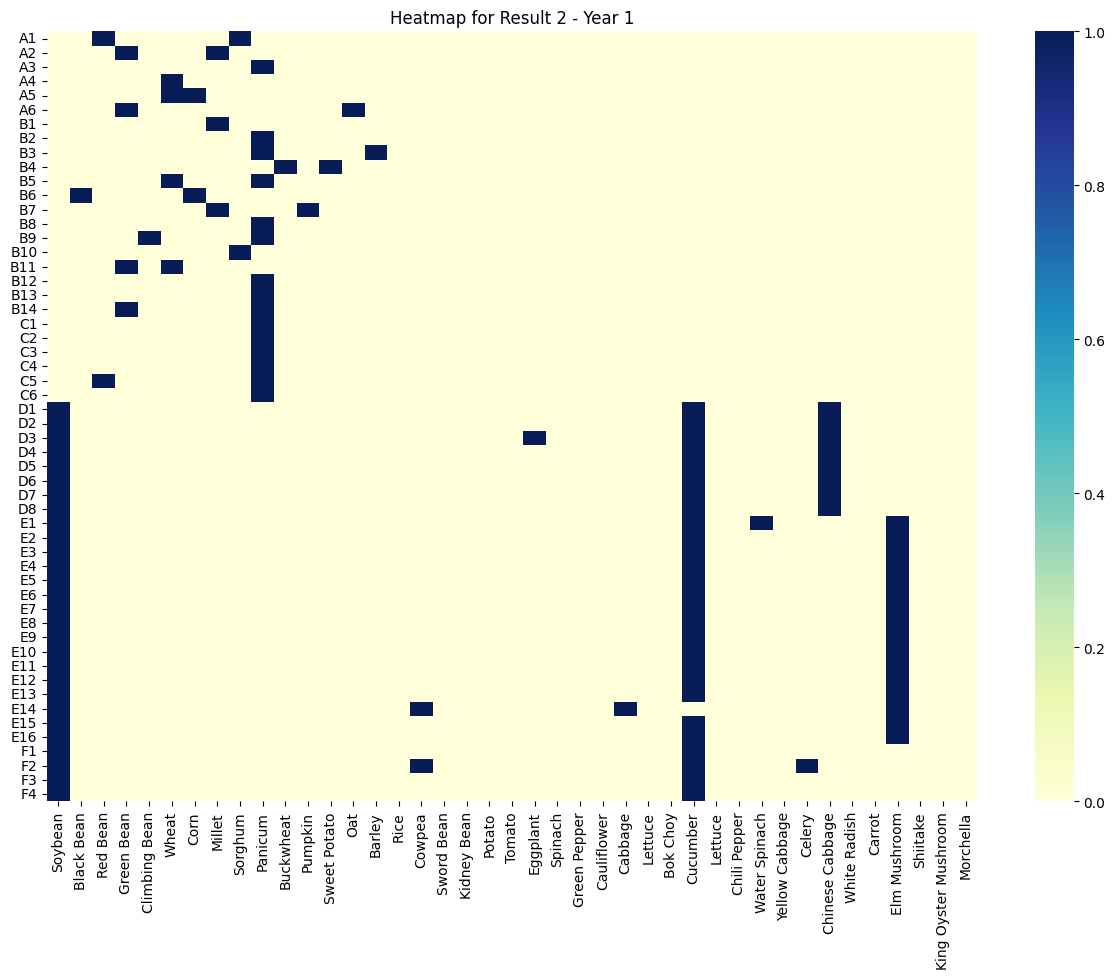

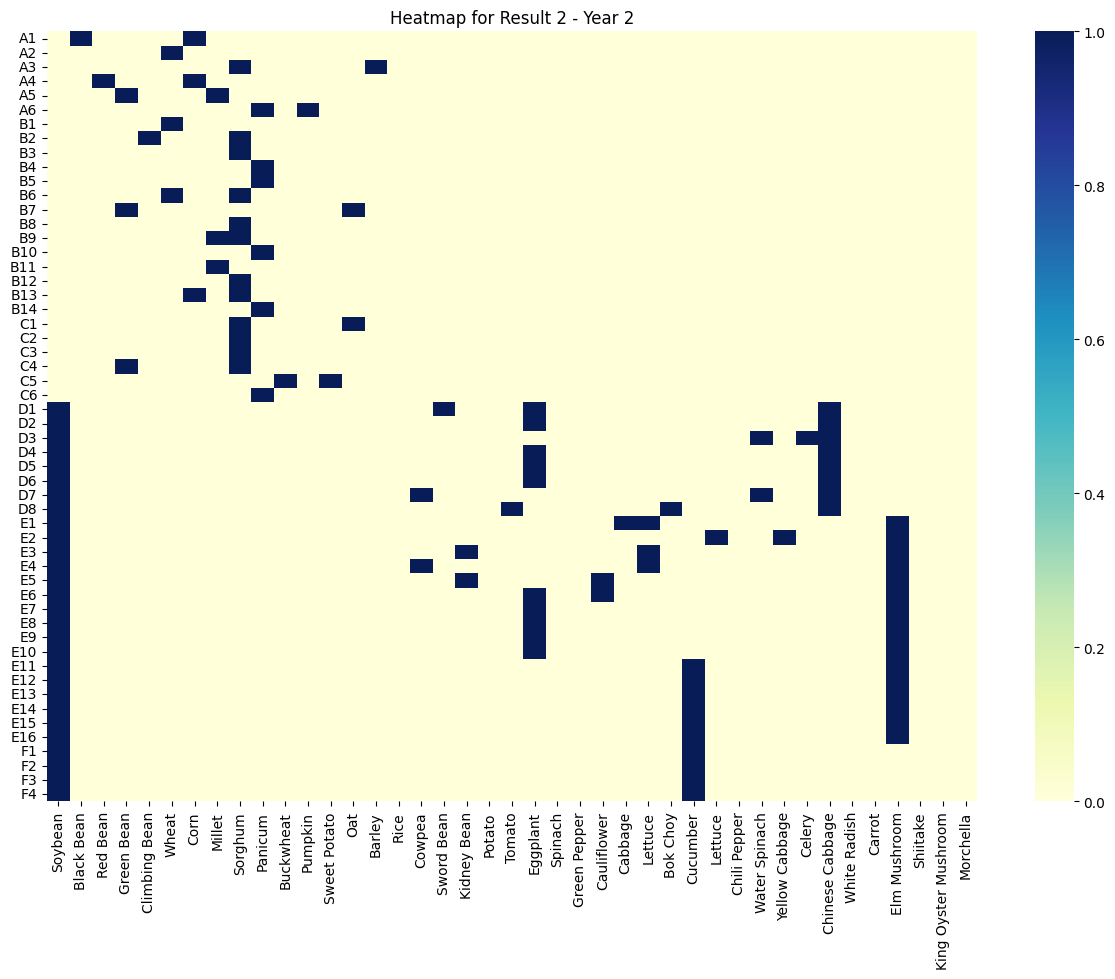

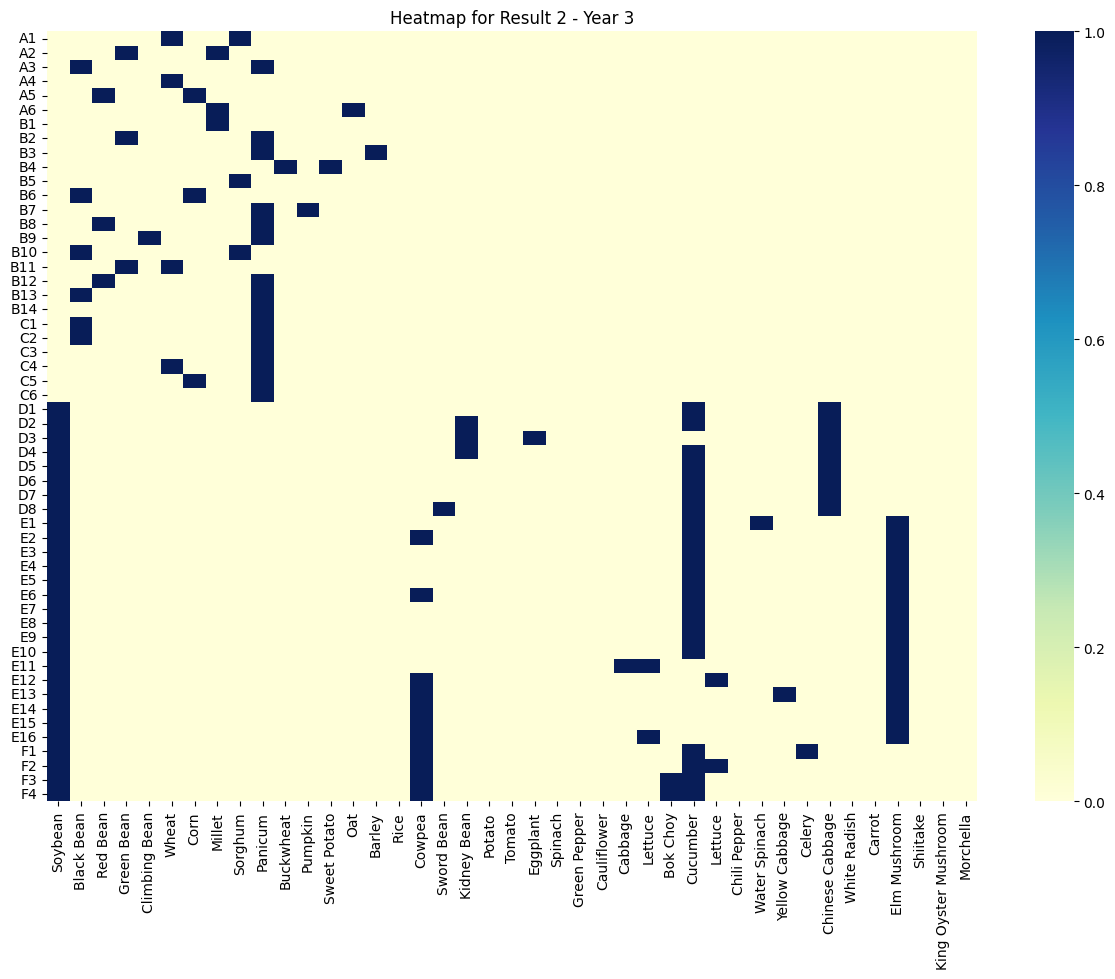

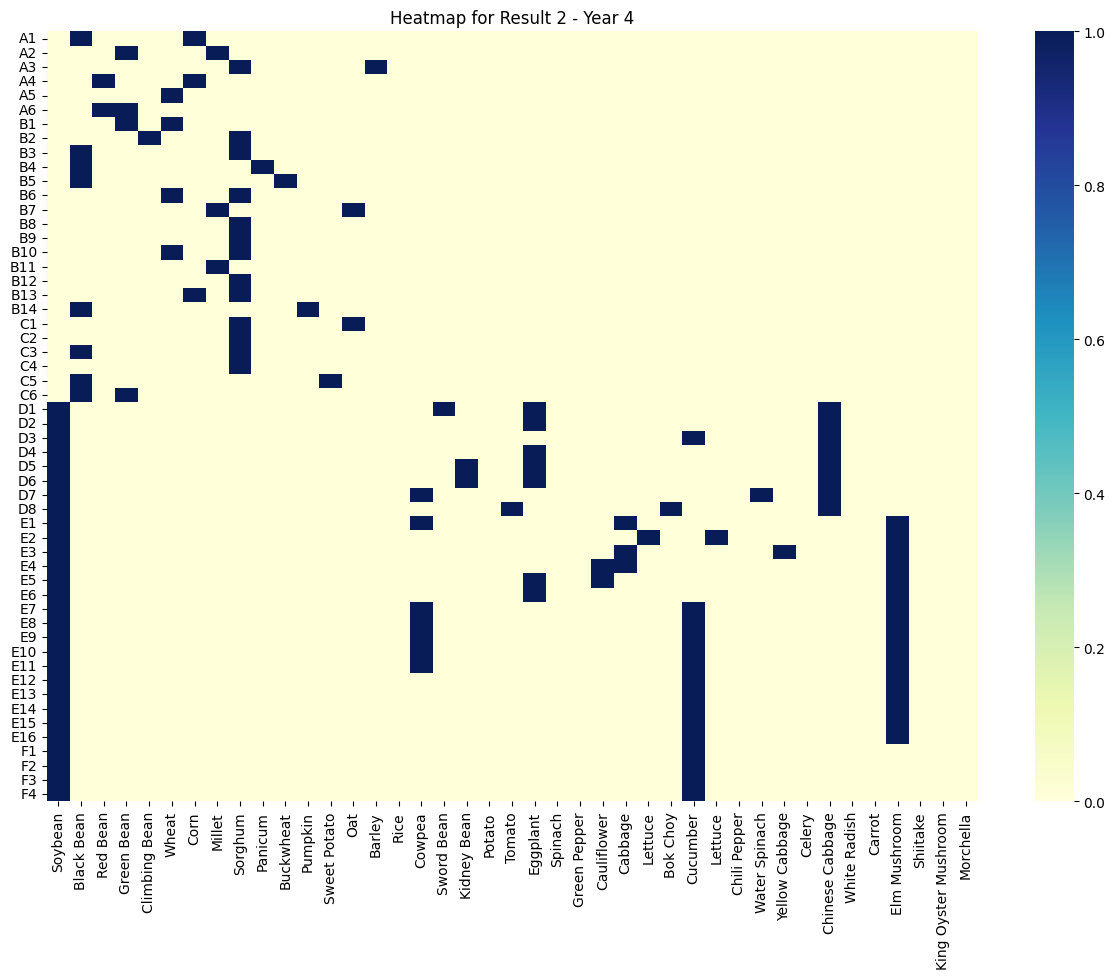

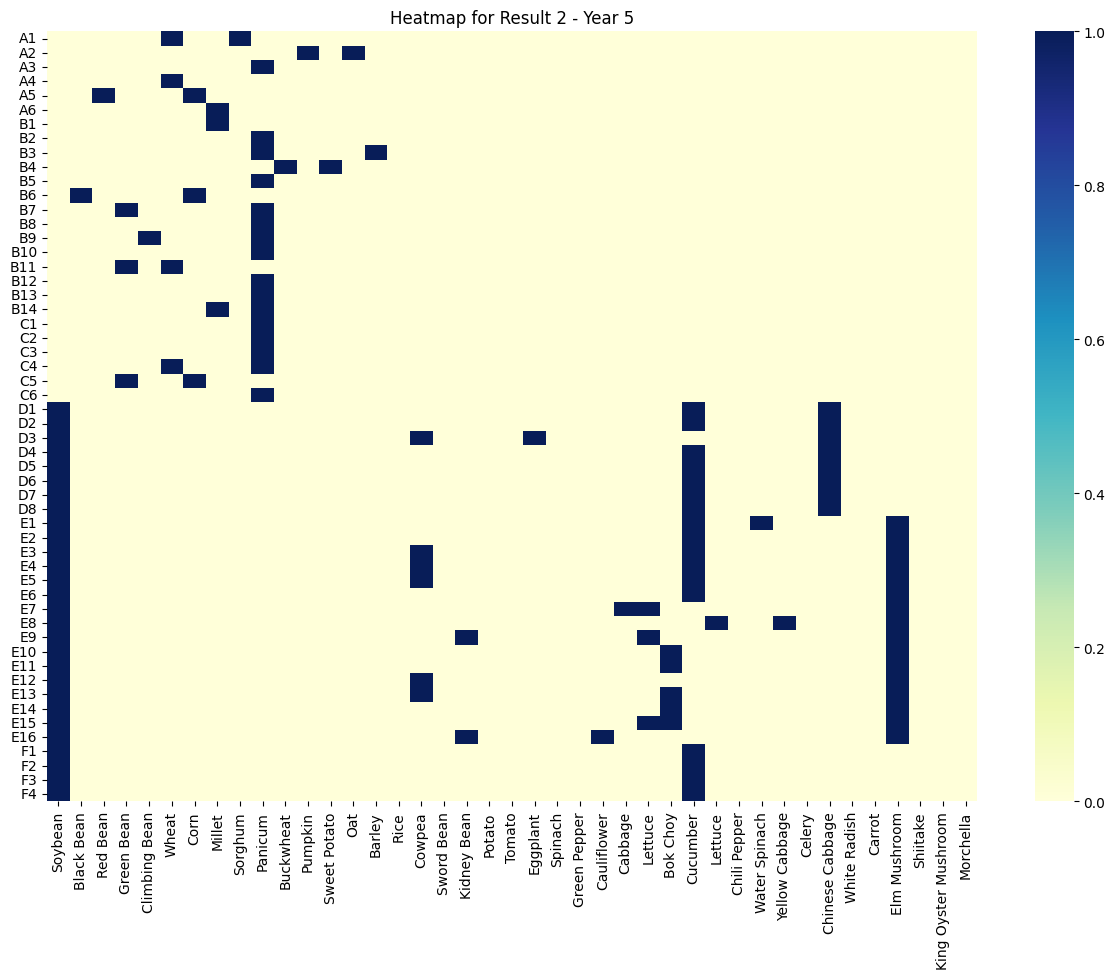

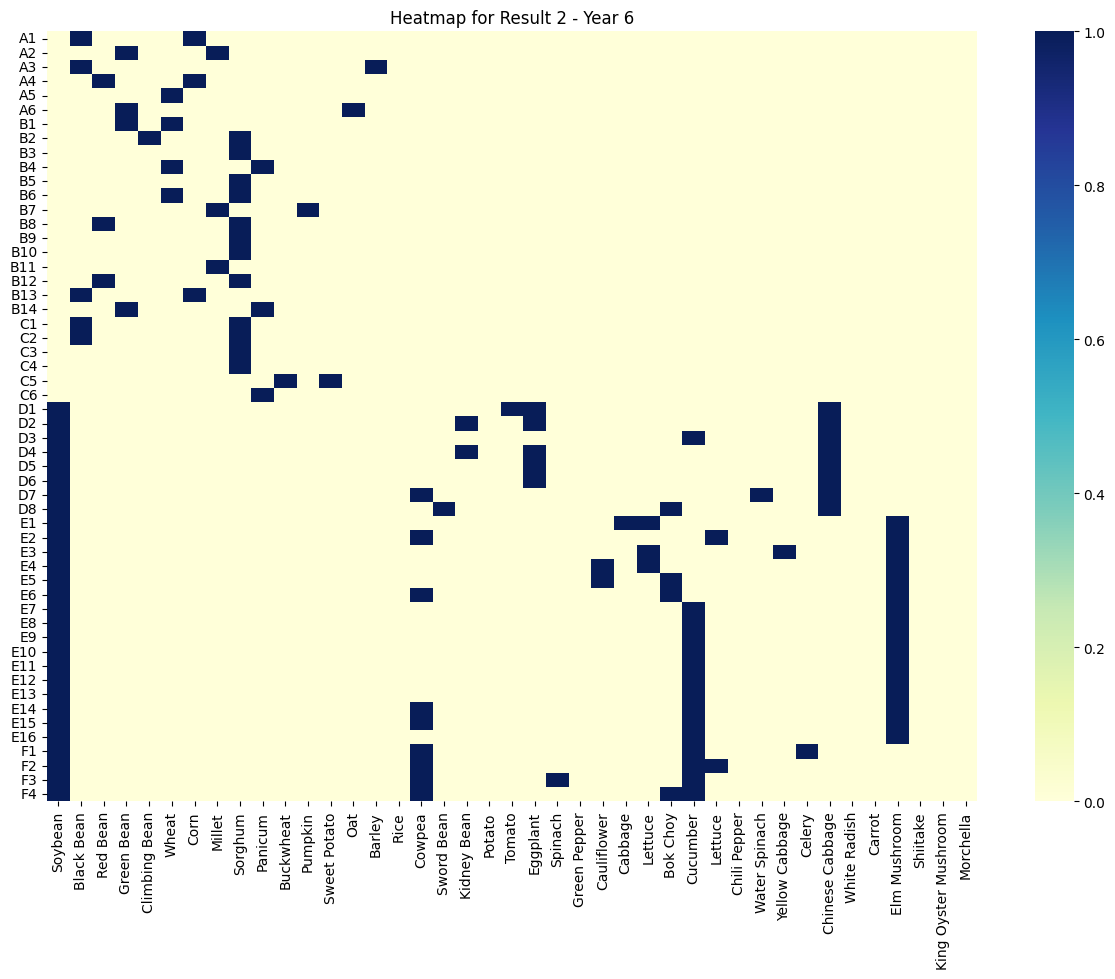

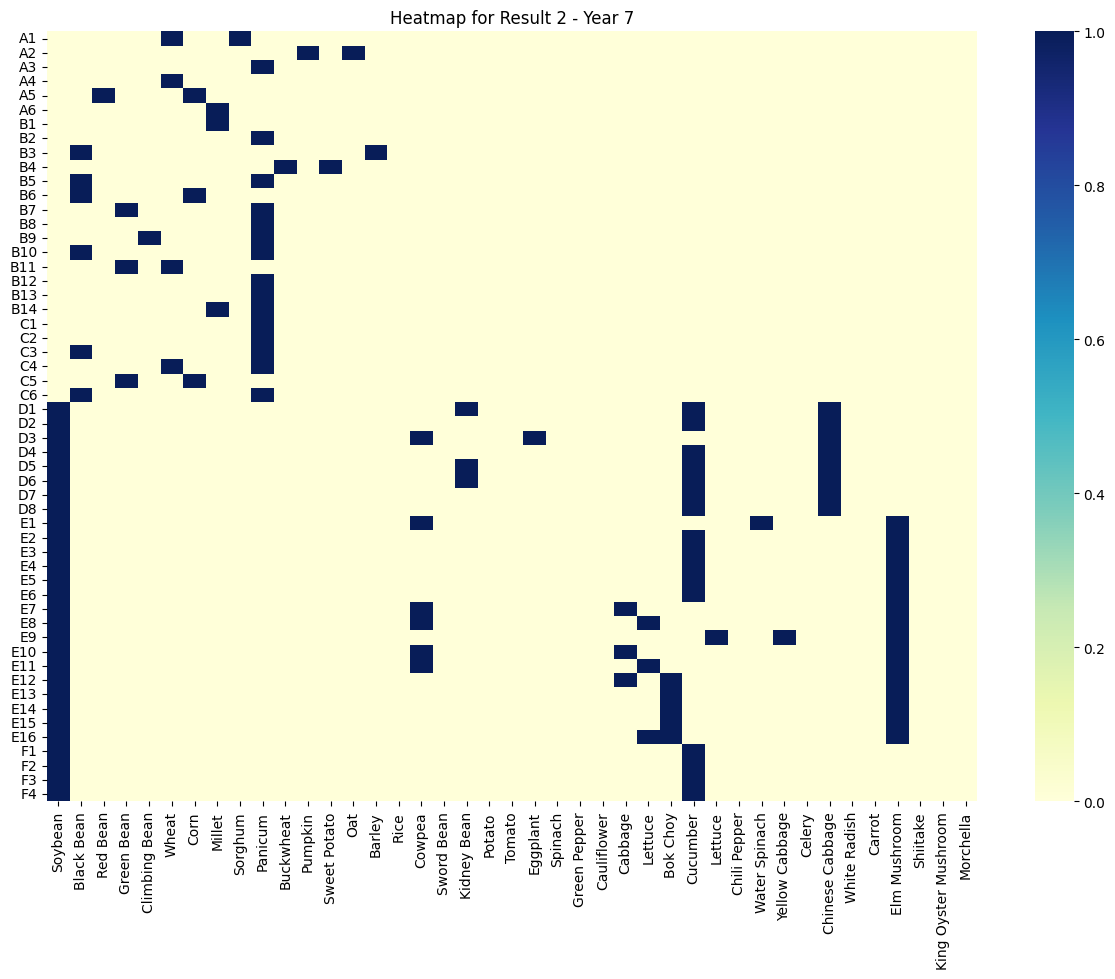

In [10]:

row_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
             'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14',
             'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
             'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
             'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16',
             'F1', 'F2', 'F3', 'F4']

column_names = ['Soybean', 'Black Bean', 'Red Bean', 'Green Bean', 'Climbing Bean', 'Wheat', 'Corn', 'Millet', 'Sorghum', 'Panicum',
                'Buckwheat', 'Pumpkin', 'Sweet Potato', 'Oat', 'Barley', 'Rice', 'Cowpea', 'Sword Bean', 'Kidney Bean', 'Potato',
                'Tomato', 'Eggplant', 'Spinach', 'Green Pepper', 'Cauliflower', 'Cabbage', 'Lettuce', 'Bok Choy', 'Cucumber',
                'Lettuce', 'Chili Pepper', 'Water Spinach', 'Yellow Cabbage', 'Celery', 'Chinese Cabbage', 'White Radish',
                'Carrot', 'Elm Mushroom', 'Shiitake', 'King Oyster Mushroom', 'Morchella']

# 构造一个 54 行 41 列的二维数组，默认值设为 0，表示没有种植作物
matrix_result2 = np.zeros((len(row_names), len(column_names)))


def fill_matrix(result, matrix):
    for i, crops in enumerate(result):
        if crops:  # 仅处理非空的地块
            for crop_id in crops:
                matrix[i][crop_id - 1] = 1  # crop_id-1 对应列索引

# 遍历每一年，生成热力图


def plot_heatmaps_for_each_year(results, row_names, column_names, title_prefix):
    for year, result in enumerate(results):
        # 创建 0 矩阵，大小为 [地块数 x 作物数]
        matrix = np.zeros((len(row_names), len(column_names)))

        # 填充矩阵
        fill_matrix(result, matrix)

        # 转换为 DataFrame，行名为地块，列名为作物
        df_result = pd.DataFrame(matrix, index=row_names, columns=column_names)

        # 绘制热力图
        plt.figure(figsize=(15, 10))
        sns.heatmap(df_result, cmap="YlGnBu", annot=False, cbar=True)
        plt.title(f"{title_prefix} - Year {year + 1}")
        plt.show()



# 绘制 result2 的每一年热力图
plot_heatmaps_for_each_year(
    result2, row_names, column_names, "Heatmap for Result 2")